In [1]:
import pandas as pd
import scipy
import numpy as np

In [2]:
a = np.load('./preprocessed/collaborative_input/expertise.npy')
b = np.load('./preprocessed/collaborative_input/test_expertise.npy')

In [3]:
train_sample = pd.read_pickle('./preprocessed/collaborative_input/new_train_sample.pkl')

In [4]:
test_sample = pd.read_pickle('./preprocessed/collaborative_input/new_test_sample.pkl')

In [5]:
def calculate_percentage_star(df,star):
    return len(df.loc[df['overall']==star])/len(df)

In [6]:
print(f"The number of unique reviewers in train {len(train_sample['reviewerID'].unique())}")
print(f"The number of unique movies in train {len(train_sample['movieID'].unique())}")
print(f"The distribution of overall in train: 1 star {str(calculate_percentage_star(train_sample,1))}%")
print(f"The distribution of overall in train: 2 star {str(calculate_percentage_star(train_sample,2))}%")
print(f"The distribution of overall in train: 3 star {str(calculate_percentage_star(train_sample,3))}%")
print(f"The distribution of overall in train: 4 star {str(calculate_percentage_star(train_sample,4))}%")
print(f"The distribution of overall in train: 5 star {str(calculate_percentage_star(train_sample,5))}%")

The number of unique reviewers in train 8351
The number of unique movies in train 6692
The distribution of overall in train: 1 star 0.06326887284942576%
The distribution of overall in train: 2 star 0.07915702029143402%
The distribution of overall in train: 3 star 0.14796404739207408%
The distribution of overall in train: 4 star 0.27149439375368833%
The distribution of overall in train: 5 star 0.43811566571337784%


In [7]:
print(f"The number of unique reviewers in test {len(test_sample['reviewerID'].unique())}")
print(f"The number of unique movies in test {len(test_sample['movieID'].unique())}")
print(f"The distribution of overall in test: 1 star {str(calculate_percentage_star(test_sample,1))}%")
print(f"The distribution of overall in test: 2 star {str(calculate_percentage_star(test_sample,2))}%")
print(f"The distribution of overall in test: 3 star {str(calculate_percentage_star(test_sample,3))}%")
print(f"The distribution of overall in test: 4 star {str(calculate_percentage_star(test_sample,4))}%")
print(f"The distribution of overall in test: 5 star {str(calculate_percentage_star(test_sample,5))}%")

The number of unique reviewers in test 2604
The number of unique movies in test 5658
The distribution of overall in test: 1 star 0.06296281309432282%
The distribution of overall in test: 2 star 0.0818192853963501%
The distribution of overall in test: 3 star 0.1496783069639461%
The distribution of overall in test: 4 star 0.2687654271031441%
The distribution of overall in test: 5 star 0.4367741674422369%


(0.0, 0.55)

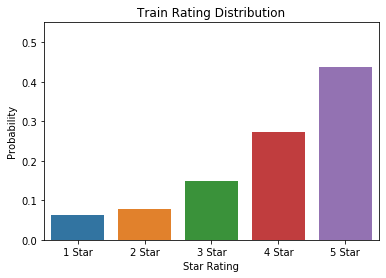

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
stars = ['1 Star','2 Star', '3 Star', '4 Star', '5 Star']
percentage = [calculate_percentage_star(train_sample,1),calculate_percentage_star(train_sample,2),calculate_percentage_star(train_sample,3),calculate_percentage_star(train_sample,4),calculate_percentage_star(train_sample,5)]
d = {'Star Rating':stars,'Probability':percentage}
star_df_train = pd.DataFrame(d)
star_df_train


sns.barplot(x='Star Rating', y='Probability',data=star_df_train)
plt.title('Train Rating Distribution')
plt.ylim(top=0.55)

(0.0, 0.55)

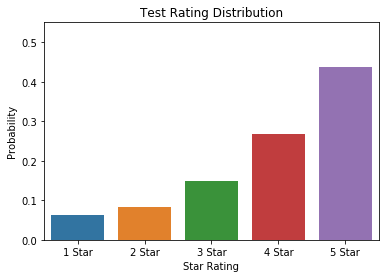

In [9]:
stars = ['1 Star','2 Star', '3 Star', '4 Star', '5 Star']
percentage = [calculate_percentage_star(test_sample,1),calculate_percentage_star(test_sample,2),calculate_percentage_star(test_sample,3),calculate_percentage_star(test_sample,4),calculate_percentage_star(test_sample,5)]
d = {'Star Rating':stars,'Probability':percentage}
star_df_train = pd.DataFrame(d)
star_df_train

sns.barplot(x='Star Rating', y='Probability',data=star_df_train)
plt.title('Test Rating Distribution')
plt.ylim(top=0.55)

In [10]:
def calculate_sparsity(df):
    numerator = len(df)
    num_reviewers = len(df['reviewerID'].unique())
    num_movies = len(df['movieID'].unique())
    denom = num_reviewers*num_movies
    
    return numerator/denom

In [11]:
sparsity_train = calculate_sparsity(train_sample)
sparsity_train

0.001576740991107221

In [12]:
sparsity_test = calculate_sparsity(test_sample)
sparsity_test

0.001677341708299872

The sparsity metric is the number of cells in a matrix that contain a rating divided by the total number of values that matrix could hold given the number of users and items (movies)

In [13]:
frames = [train_sample, test_sample]

data = pd.concat(frames)
data

,reviewerID,movieID,reviewText,summary,overall
171125,AER15RIMV8E6D,1415724784,This was pretty boring. Listening to the guy w...,An Inconvenient Bore!!!,2.0
407185,A1D6L5H76KMV6P,630420065X,"A great vision of the old versions, comes with...",the First Mission to get crazy!!,5.0
808445,A2RRO07OFPV06B,B0001JXOUS,A civil war Captain travels to Japan to help t...,SUPERB ENTERTAINMENT,5.0
364763,AL7LEBKKW8XCC,6303213650,"Because of their sucess with Fargo, people ten...",forgotten coen brothers,5.0
5562,A355WMP0CQBJFX,0767802497,who hasn't seen this movie. there's no need to...,BROUGHT SOME MAD FEAR OF ANACONDAS!!!,4.0
...,...,...,...,...,...
1317496,A2QVQB7D93XIPA,B0031RAOVY,"A touching tale of love, devotion through the ...","Love, loyalty and devotion",5.0
90991,A3G2OSOP4XKFZL,0790729644,This is a truly great movie. When ever I sens...,They have a sign on him,5.0
8564,A3O536E2YOKK4Y,0767807588,"Released in 1993, Bruce Willis' &#34;Striking ...",Comic book cop thriller in Pittsburgh,4.0
876721,A3MV1KKHX51FYT,B00074DY16,"Return to Peyton Place, 1961 filmAllison MacKe...",Publicizing a Small Town,4.0


In [14]:
print(f"The number of unique reviewers in data {len(data['reviewerID'].unique())}")
print(f"The number of unique movies in data {len(data['movieID'].unique())}")
print(f"The distribution of overall in data: 1 star {str(calculate_percentage_star(data,1))}%")
print(f"The distribution of overall in data: 2 star {str(calculate_percentage_star(data,2))}%")
print(f"The distribution of overall in data: 3 star {str(calculate_percentage_star(data,3))}%")
print(f"The distribution of overall in data: 4 star {str(calculate_percentage_star(data,4))}%")
print(f"The distribution of overall in data: 5 star {str(calculate_percentage_star(data,5))}%")

The number of unique reviewers in data 8351
The number of unique movies in data 6692
The distribution of overall in data: 1 star 0.06320183640730663%
The distribution of overall in data: 2 star 0.079740137730548%
The distribution of overall in data: 3 star 0.1483395226404559%
The distribution of overall in data: 4 star 0.2708966666371234%
The distribution of overall in data: 5 star 0.437821836584566%


(0.0, 0.55)

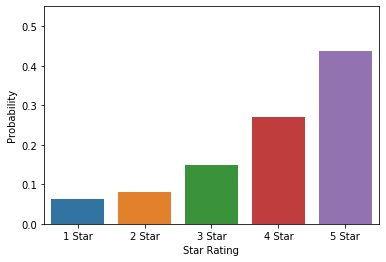

In [22]:
stars = ['1 Star','2 Star', '3 Star', '4 Star', '5 Star']
percentage = [calculate_percentage_star(data,1),calculate_percentage_star(data,2),calculate_percentage_star(data,3),calculate_percentage_star(data,4),calculate_percentage_star(data,5)]
d = {'Star Rating':stars,'Probability':percentage}
star_df_train = pd.DataFrame(d)
star_df_train

sns.barplot(x='Star Rating', y='Probability',data=star_df_train)
#plt.title('Rating Distribution')
plt.ylim(top=0.55)

In [16]:
sparsity_data = calculate_sparsity(data)
sparsity_data

0.00201895353041033

In [17]:
reviewer_dist_train = train_sample.groupby(['reviewerID'])['overall'].count()
reviewer_dist_train

reviewerID
A100JCBNALJFAW    12
A1027EV8A9PV1O     3
A102B8D74H64TO     8
A102YM3H3O003E     5
A103KNDW8GN92L    14
                  ..
AZXHK8IO25FL6      7
AZXTPGNAB366A      5
AZXUFTJVXJWL0      5
AZYJ9TS07B02W      7
AZZ1KF8RAO1BR      6
Name: overall, Length: 8351, dtype: int64

(0, 100)

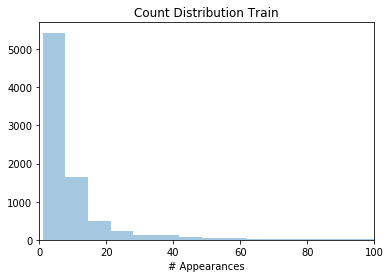

In [18]:
#Number of times each reviewer appeared in training dataset.
plt.title('Count Distribution Train')
sns.distplot(reviewer_dist_train,kde=False)
plt.xlabel('# Appearances')
plt.xlim(0,100)

In [19]:
reviewer_dist_test = test_sample.groupby(['reviewerID'])['overall'].count()
reviewer_dist_test

reviewerID
A1027EV8A9PV1O     3
A103KNDW8GN92L     9
A103QX7NUHBOUF     2
A106016KSI0YQ     13
A107H3XGCV6Y4Q     1
                  ..
AZSN1TO0JI87B     31
AZUBX0AYYNTFF      9
AZXGPM8EKSHE9      2
AZXHK8IO25FL6      3
AZXUFTJVXJWL0      1
Name: overall, Length: 2604, dtype: int64

(0, 100)

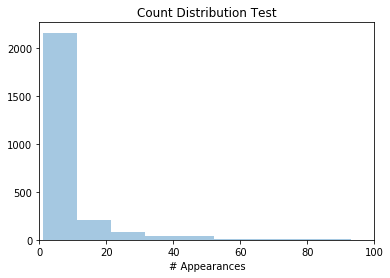

In [20]:
plt.title('Count Distribution Test')
sns.distplot(reviewer_dist_test,kde=False,)
plt.xlabel('# Appearances')
plt.xlim(0,100)